# Evaluation

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, IsolationForest

## Setup

In [2]:
pd.set_option('display.max_columns', None)
sns.set()

In [48]:
sessions = pd.read_csv('sessions_preprocessed.csv', delimiter=';')
sessions_dbscan = pd.read_csv('sessions_dbscan.csv', delimiter=';')
sessions_gmm = pd.read_csv('sessions_gmm.csv', delimiter=';')
sessions_kmeans = pd.read_csv('sessions_kmeans.csv', delimiter=';')

# Individual Evaluation

## K-Means

### Cluster Distribution

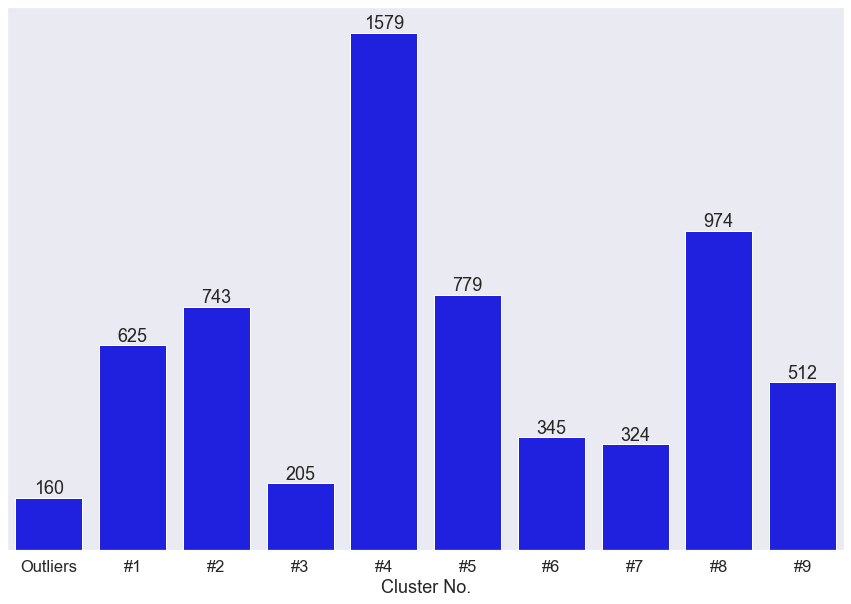

In [27]:
cluster_names = np.sort(sessions_kmeans['cluster'].unique()) + 1
cluster_names = cluster_names.tolist()
cluster_names = ['#' + str(x) for x in cluster_names]
cluster_names[0] = "Outliers"
sns.set(rc = {'figure.figsize':(15,10)}, style="darkgrid", font_scale=1.5)
ax = sns.countplot(data=sessions_kmeans, color="blue", x="cluster")
ax.set(xlabel='Cluster No.', ylabel=None, yticklabels=[], xticklabels=cluster_names, yticks=[])
ax.margins(x=0.01)
ax.bar_label(ax.containers[0])
plt.show()

### Feature Importance

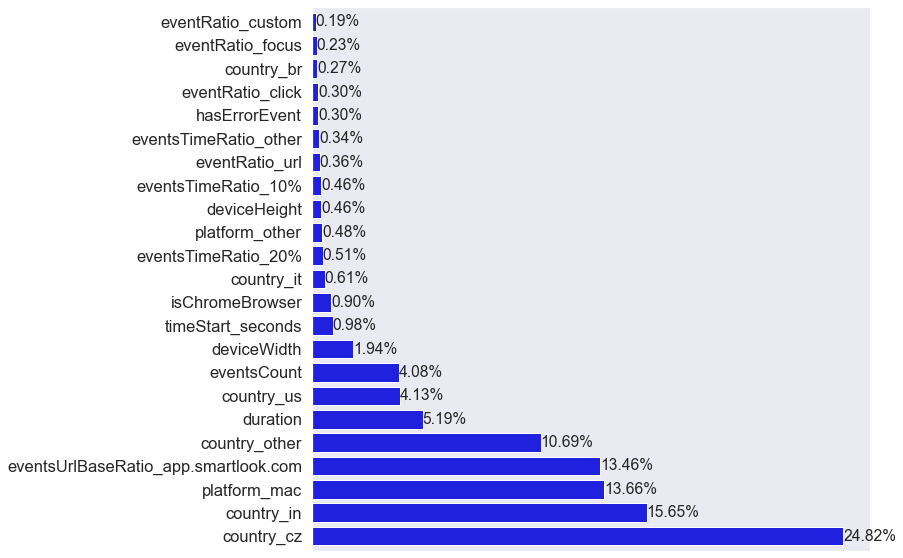

In [30]:
sns.set(rc = {'figure.figsize':(10,10)})
X_train, X_test, y_train, y_test = train_test_split(sessions_to_show.drop(["id", "cluster"],axis=1), sessions_to_show.cluster, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()
sns.set(rc = {'figure.figsize':(10,10)}, style="darkgrid", font_scale=1.5)
feature_importance_values = rf.feature_importances_[sorted_idx] * 100
ax = sns.barplot(y=sessions_to_show.drop(["id", "cluster"],axis=1).columns[sorted_idx], x=feature_importance_values, color="blue")
ax.margins(y=0.01)
ax.set(xticks=[], xticklabels=[])
sns.set(font_scale=1.3)
ax.bar_label(ax.containers[0], fmt='%.2f%%')

kmeans_feature_importance_values = sorted([(column, value) for column, value in zip(sessions_kmeans.drop(["id", "cluster"],axis=1).columns[sorted_idx], feature_importance_values)])

plt.show()

### Visualization using PCA

#### 2D

In [8]:
pca_2d = PCA(n_components=2)
pca_2d.fit(sessions_kmeans.drop(["id", "cluster"],axis=1))
sessions_pca_2d = pd.DataFrame(pca_2d.fit_transform(sessions_kmeans.drop(["id", "cluster"],axis=1)), columns=["PC1", "PC2"])

print('Explained variation per principal component: {}'.format(pca_2d.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2d.explained_variance_ratio_)))
sessions_pca_2d["cluster"] = sessions_kmeans.cluster

Explained variation per principal component: [0.16084665 0.14547845]
Cumulative variance explained by 2 principal components: 30.63%


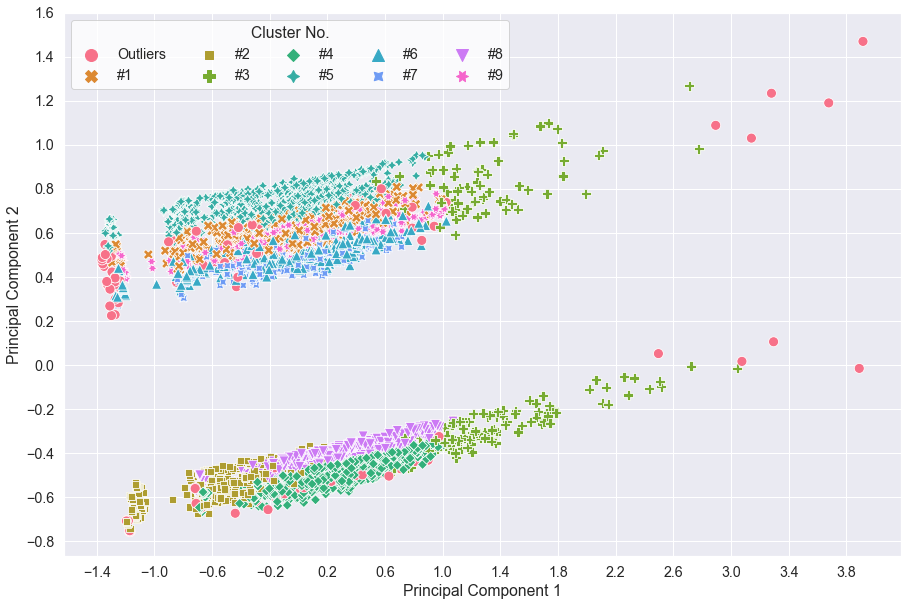

In [9]:
sns.set(rc = {'figure.figsize':(15,10)}, font_scale=1.3)
ax = sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=sessions_pca_2d, palette=sns.husl_palette(len(cluster_names)), markers=True, style="cluster", s=100)
ax.set(xticks=np.arange(-1.4, 4.1, 0.4), yticks=np.arange(-0.8, 1.6, 0.2))
ax.set(xlabel='Principal Component 1', ylabel='Principal Component 2')
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, cluster_names, title="Cluster No.", loc="upper left", ncol=round(len(cluster_names)/2), markerscale=2)
legend.get_frame().set_facecolor('#FFFFFF')
plt.show()

#### 3D

In [56]:
pca_3d = PCA(n_components=3)
pca_3d.fit(sessions_kmeans.drop(["id", "cluster"],axis=1))
sessions_pca_3d = pd.DataFrame(pca_3d.fit_transform(sessions_kmeans.drop(["id", "cluster"],axis=1)), columns=["PC1", "PC2", "PC3"])

print('Explained variation per principal component: {}'.format(pca_3d.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca_3d.explained_variance_ratio_)))
sessions_pca_3d["cluster"] = sessions_kmeans.cluster

Explained variation per principal component: [0.16084665 0.14547844 0.11910741]
Cumulative variance explained by 3 principal components: 42.54%


In [57]:
%matplotlib widget

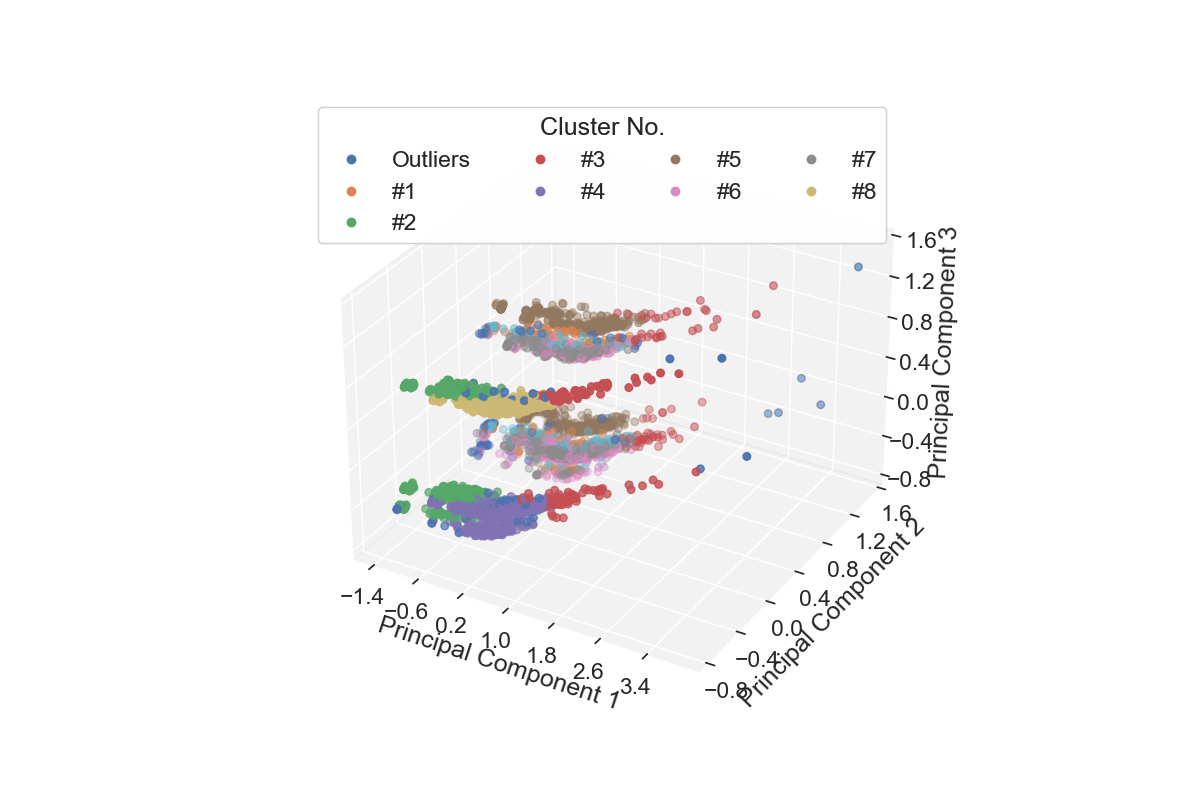

In [58]:
# sns.set(rc = {'figure.figsize':(10,10)}, font_scale=1.3)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')
plt.rcParams['grid.color'] = 'darkgray'
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.5))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.5))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.5))

cmap = ListedColormap(sns.color_palette().as_hex())
sc = ax.scatter(sessions_pca_3d.PC1, sessions_pca_3d.PC2, sessions_pca_3d.PC3, c=sessions_pca_3d.cluster, cmap=cmap, s=30, marker='o')
ax.set(xticks=np.arange(-1.4, 4.1, 0.8), yticks=np.arange(-0.8, 1.6, 0.4), zticks=np.arange(-0.8, 1.6, 0.4), xlabel='Principal Component 1', ylabel='Principal Component 2', zlabel='Principal Component 3')
legend = ax.legend(sc.legend_elements()[0], cluster_names, title="Cluster No.", loc="upper left", ncol=round(len(cluster_names)/2), bbox_to_anchor=(0, 1))
legend.get_frame().set_facecolor('#FFFFFF')
ax.add_artist(legend)
plt.show()

## DBSCAN

### Cluster Distribution

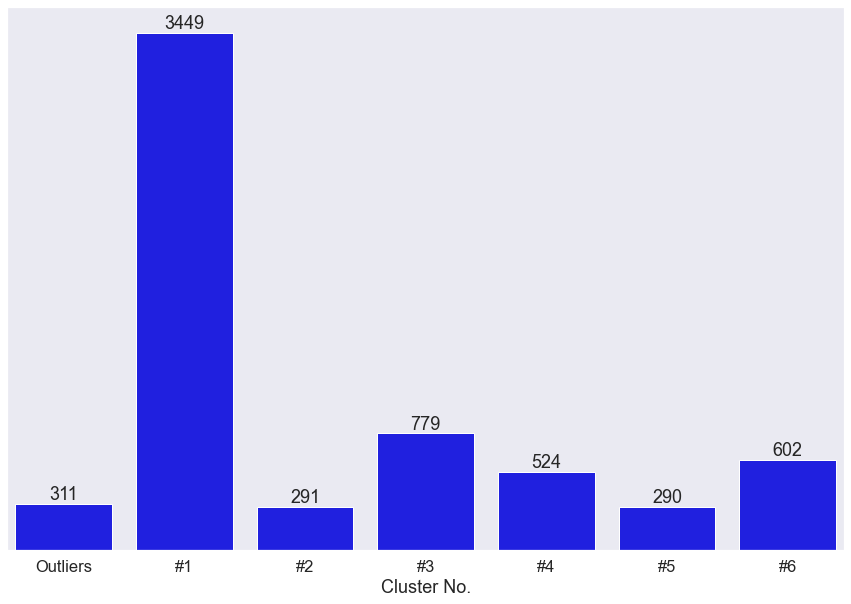

In [28]:
cluster_names = np.sort(sessions_dbscan['cluster'].unique()) + 1
cluster_names = cluster_names.tolist()
cluster_names = ['#' + str(x) for x in cluster_names]
cluster_names[0] = "Outliers"
sns.set(rc = {'figure.figsize':(15,10)}, style="darkgrid", font_scale=1.5)
ax = sns.countplot(data=sessions_dbscan, color="blue", x="cluster")
ax.set(xlabel='Cluster No.', ylabel=None, yticklabels=[], xticklabels=cluster_names, yticks=[])
ax.margins(x=0.01)
ax.bar_label(ax.containers[0])
plt.show()

### Feature Importance

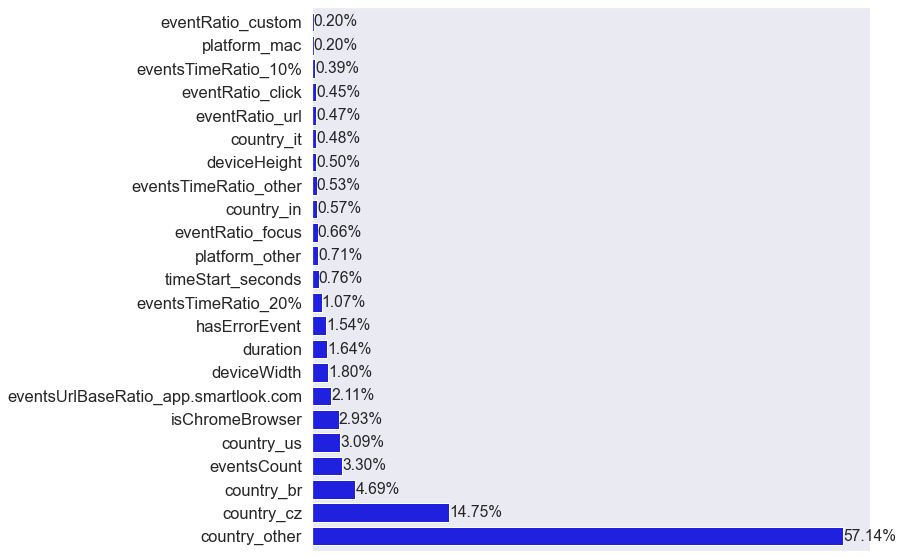

In [31]:
sns.set(rc = {'figure.figsize':(10,10)})
X_train, X_test, y_train, y_test = train_test_split(sessions_dbscan.drop(["id", "cluster"],axis=1), sessions_dbscan.cluster, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()
sns.set(rc = {'figure.figsize':(10,10)}, style="darkgrid", font_scale=1.5)
feature_importance_values = rf.feature_importances_[sorted_idx] * 100
ax = sns.barplot(y=sessions_dbscan.drop(["id", "cluster"],axis=1).columns[sorted_idx], x=feature_importance_values, color="blue")
ax.margins(y=0.01)
ax.set(xticks=[], xticklabels=[])
sns.set(font_scale=1.3)
ax.bar_label(ax.containers[0], fmt='%.2f%%')

dbscan_feature_importance_values = sorted([(column, value) for column, value in zip(sessions_dbscan.drop(["id", "cluster"],axis=1).columns[sorted_idx], feature_importance_values)])

plt.show()

### Visualization using PCA

#### 2D

In [32]:
pca_2d = PCA(n_components=2)
pca_2d.fit(sessions_dbscan.drop(["id", "cluster"],axis=1))
sessions_pca_2d = pd.DataFrame(pca_2d.fit_transform(sessions_dbscan.drop(["id", "cluster"],axis=1)), columns=["PC1", "PC2"])

print('Explained variation per principal component: {}'.format(pca_2d.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2d.explained_variance_ratio_)))
sessions_pca_2d["cluster"] = sessions_dbscan.cluster

Explained variation per principal component: [0.16084665 0.14547845]
Cumulative variance explained by 2 principal components: 30.63%


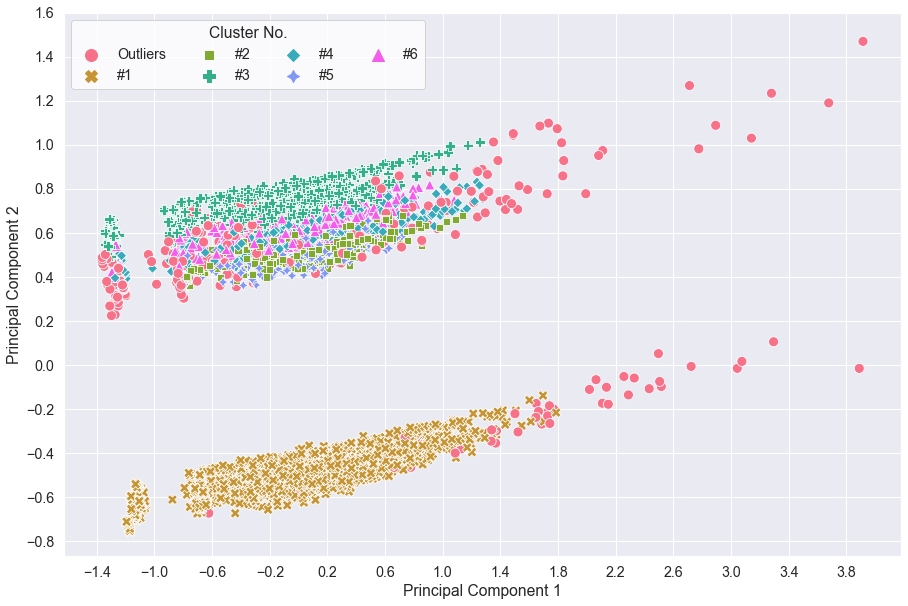

In [33]:
sns.set(rc = {'figure.figsize':(15,10)}, font_scale=1.3)
ax = sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=sessions_pca_2d, palette=sns.husl_palette(len(cluster_names)), markers=True, style="cluster", s=100)
ax.set(xticks=np.arange(-1.4, 4.1, 0.4), yticks=np.arange(-0.8, 1.6, 0.2))
ax.set(xlabel='Principal Component 1', ylabel='Principal Component 2')
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, cluster_names, title="Cluster No.", loc="upper left", ncol=round(len(cluster_names)/2), markerscale=2)
legend.get_frame().set_facecolor('#FFFFFF')
plt.show()

#### 3D

In [59]:
pca_3d = PCA(n_components=3)
pca_3d.fit(sessions_dbscan.drop(["id", "cluster"],axis=1))
sessions_pca_3d = pd.DataFrame(pca_3d.fit_transform(sessions_dbscan.drop(["id", "cluster"],axis=1)), columns=["PC1", "PC2", "PC3"])

print('Explained variation per principal component: {}'.format(pca_3d.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca_3d.explained_variance_ratio_)))
sessions_pca_3d["cluster"] = sessions_dbscan.cluster

Explained variation per principal component: [0.16084664 0.14547844 0.11910728]
Cumulative variance explained by 3 principal components: 42.54%


In [ ]:
%matplotlib widget

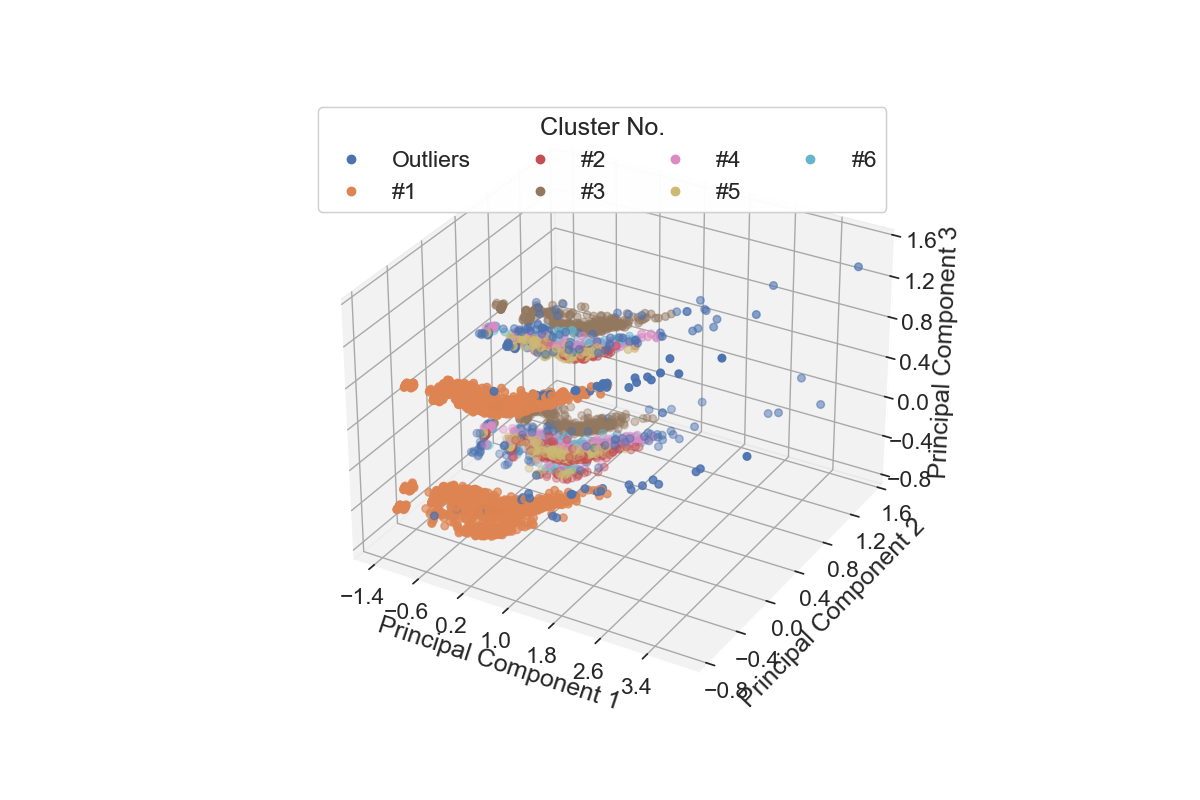

In [60]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')
plt.rcParams['grid.color'] = 'darkgray'
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.5))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.5))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.5))

cmap = ListedColormap(sns.color_palette().as_hex())
sc = ax.scatter(sessions_pca_3d.PC1, sessions_pca_3d.PC2, sessions_pca_3d.PC3, c=sessions_pca_3d.cluster, cmap=cmap, s=30, marker='o')
ax.set(xticks=np.arange(-1.4, 4.1, 0.8), yticks=np.arange(-0.8, 1.6, 0.4), zticks=np.arange(-0.8, 1.6, 0.4), xlabel='Principal Component 1', ylabel='Principal Component 2', zlabel='Principal Component 3')
legend = ax.legend(sc.legend_elements()[0], cluster_names, title="Cluster No.", loc="upper left", ncol=round(len(cluster_names)/2), bbox_to_anchor=(0, 1))
legend.get_frame().set_facecolor('#FFFFFF')
ax.add_artist(legend)
plt.show()

## Gaussian Mixture Model

### Cluster Distribution

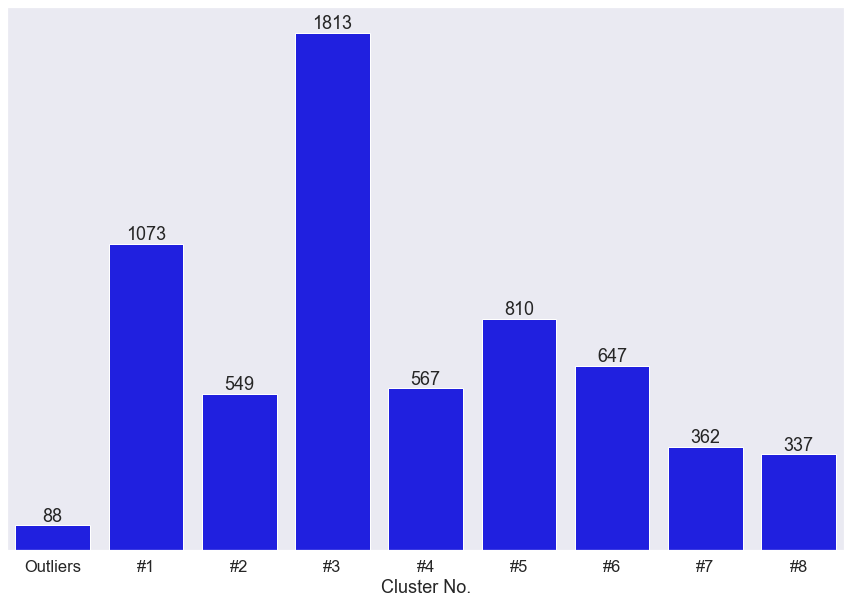

In [35]:
cluster_names = np.sort(sessions_gmm['cluster'].unique()) + 1
cluster_names = cluster_names.tolist()
cluster_names = ['#' + str(x) for x in cluster_names]
cluster_names[0] = "Outliers"
sns.set(rc = {'figure.figsize':(15,10)}, style="darkgrid", font_scale=1.5)
ax = sns.countplot(data=sessions_gmm, color="blue", x="cluster")
ax.set(xlabel='Cluster No.', ylabel=None, yticklabels=[], xticklabels=cluster_names, yticks=[])
ax.margins(x=0.01)
ax.bar_label(ax.containers[0])
plt.show()

### Feature Importance

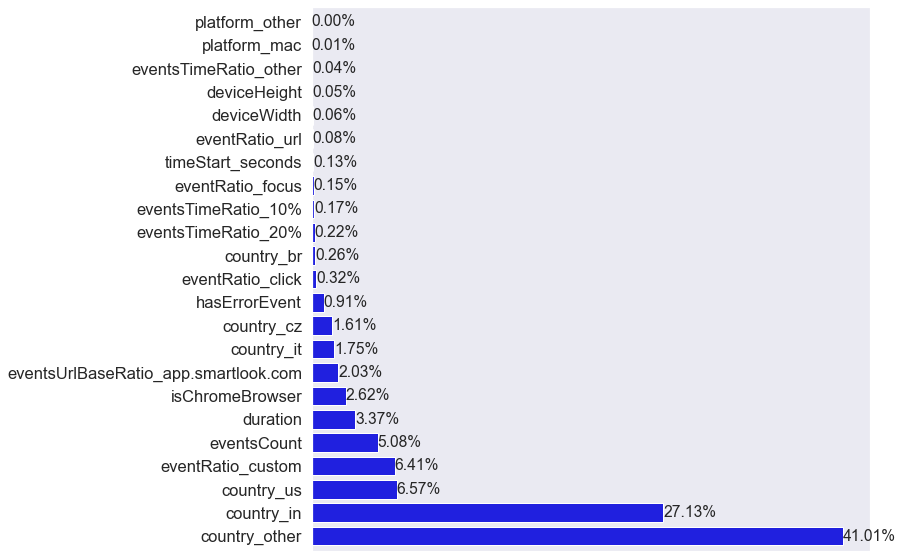

In [37]:
sns.set(rc = {'figure.figsize':(10,10)})
X_train, X_test, y_train, y_test = train_test_split(sessions_gmm.drop(["id", "cluster"],axis=1), sessions_gmm.cluster, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()
sns.set(rc = {'figure.figsize':(10,10)}, style="darkgrid", font_scale=1.5)
feature_importance_values = rf.feature_importances_[sorted_idx] * 100
ax = sns.barplot(y=sessions_gmm.drop(["id", "cluster"],axis=1).columns[sorted_idx], x=feature_importance_values, color="blue")
ax.margins(y=0.01)
ax.set(xticks=[], xticklabels=[])
sns.set(font_scale=1.3)
ax.bar_label(ax.containers[0], fmt='%.2f%%')

gmm_feature_importance_values = sorted([(column, value) for column, value in zip(sessions_gmm.drop(["id", "cluster"],axis=1).columns[sorted_idx], feature_importance_values)])

plt.show()

### Visualization using PCA

#### 2D

In [38]:
pca_2d = PCA(n_components=2)
pca_2d.fit(sessions_gmm.drop(["id", "cluster"],axis=1))
sessions_pca_2d = pd.DataFrame(pca_2d.fit_transform(sessions_gmm.drop(["id", "cluster"],axis=1)), columns=["PC1", "PC2"])

print('Explained variation per principal component: {}'.format(pca_2d.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2d.explained_variance_ratio_)))
sessions_pca_2d["cluster"] = sessions_gmm.cluster

Explained variation per principal component: [0.16084665 0.14547845]
Cumulative variance explained by 2 principal components: 30.63%


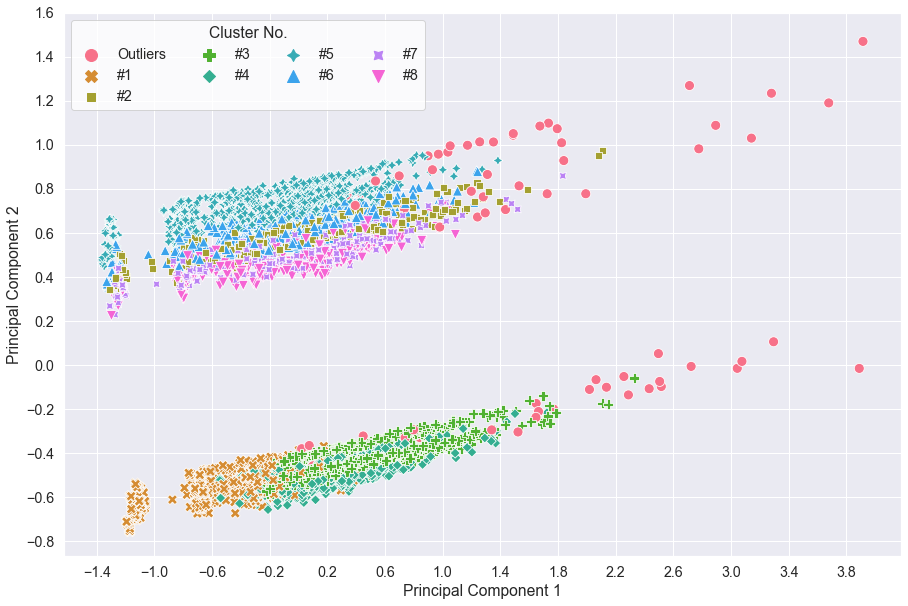

In [39]:
sns.set(rc = {'figure.figsize':(15,10)}, font_scale=1.3)
ax = sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=sessions_pca_2d, palette=sns.husl_palette(len(cluster_names)), markers=True, style="cluster", s=100)
ax.set(xticks=np.arange(-1.4, 4.1, 0.4), yticks=np.arange(-0.8, 1.6, 0.2))
ax.set(xlabel='Principal Component 1', ylabel='Principal Component 2')
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, cluster_names, title="Cluster No.", loc="upper left", ncol=round(len(cluster_names)/2), markerscale=2)
legend.get_frame().set_facecolor('#FFFFFF')
plt.show()

#### 3D

In [61]:
pca_3d = PCA(n_components=3)
pca_3d.fit(sessions_gmm.drop(["id", "cluster"],axis=1))
sessions_pca_3d = pd.DataFrame(pca_3d.fit_transform(sessions_gmm.drop(["id", "cluster"],axis=1)), columns=["PC1", "PC2", "PC3"])

print('Explained variation per principal component: {}'.format(pca_3d.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca_3d.explained_variance_ratio_)))
sessions_pca_3d["cluster"] = sessions_gmm.cluster

Explained variation per principal component: [0.16084664 0.14547845 0.1191074 ]
Cumulative variance explained by 3 principal components: 42.54%


In [ ]:
%matplotlib widget

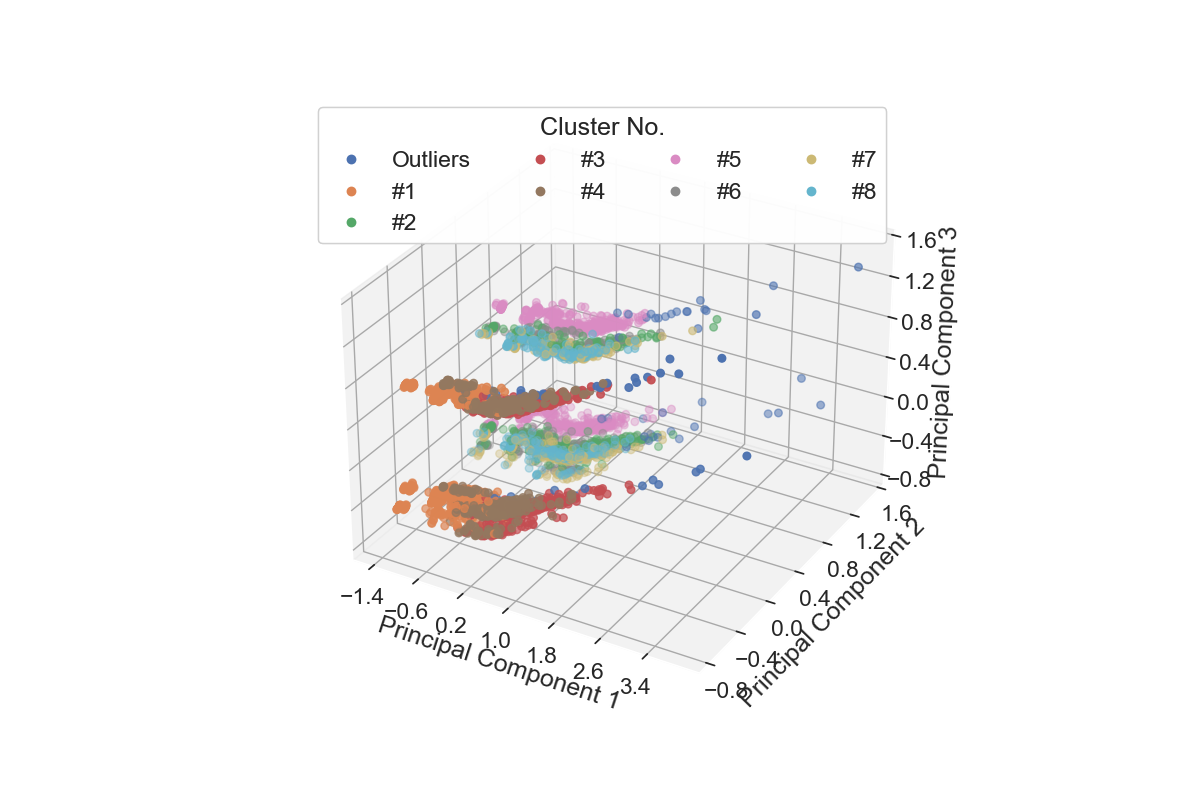

In [62]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')
plt.rcParams['grid.color'] = 'darkgray'
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.5))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.5))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.5))

cmap = ListedColormap(sns.color_palette().as_hex())
sc = ax.scatter(sessions_pca_3d.PC1, sessions_pca_3d.PC2, sessions_pca_3d.PC3, c=sessions_pca_3d.cluster, cmap=cmap, s=30, marker='o')
ax.set(xticks=np.arange(-1.4, 4.1, 0.8), yticks=np.arange(-0.8, 1.6, 0.4), zticks=np.arange(-0.8, 1.6, 0.4), xlabel='Principal Component 1', ylabel='Principal Component 2', zlabel='Principal Component 3')
legend = ax.legend(sc.legend_elements()[0], cluster_names, title="Cluster No.", loc="upper left", ncol=round(len(cluster_names)/2), bbox_to_anchor=(0, 1))
legend.get_frame().set_facecolor('#FFFFFF')
ax.add_artist(legend)
plt.show()

# Model Comparison

## Validation Scores

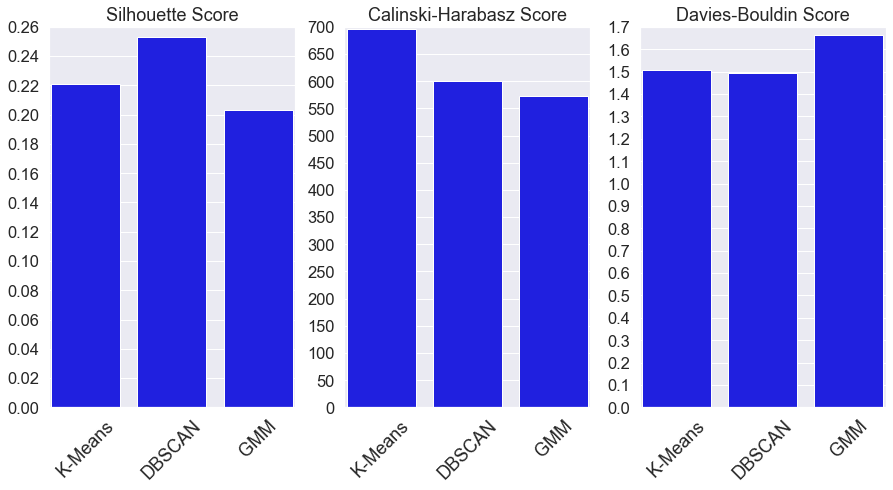

In [16]:
ss_validation_scores = [0.221, 0.253, 0.203]
ch_validation_scores = [695.972, 600.360, 572.432]
db_validation_scores = [1.508, 1.495, 1.663]

sns.set(rc = {'figure.figsize':(15,7)}, style="darkgrid", font_scale=1.5)
plt.subplot(1,3,1)
ax = sns.barplot(x="models", y="scores", data=pd.DataFrame({'models': ['kmeans','dbscan', 'gmm'], 'scores': ss_validation_scores}), color="blue")
ax.set(title='Silhouette Score', xlabel=None, ylabel=None, xticks=range(len(ss_validation_scores)), yticks=np.arange(0, 0.261, 0.02), ylim=(0,0.26))
ax.set_xticklabels(labels=['K-Means', 'DBSCAN', 'GMM'], size=18, rotation=45)
ax.margins(x=.01)
plt.subplot(1,3,2)
ax = sns.barplot(x="models", y="scores", data=pd.DataFrame({'models': ['kmeans','dbscan', 'gmm'], 'scores': ch_validation_scores}), color="blue")
ax.set(title='Calinski-Harabasz Score', xlabel=None, ylabel=None, xticks=range(len(ch_validation_scores)), yticks=np.arange(0, 701, 50), ylim=(0,700))
ax.set_xticklabels(labels=['K-Means', 'DBSCAN', 'GMM'], size=18, rotation=45)
ax.margins(x=0.01)
plt.subplot(1,3,3)
ax = sns.barplot(x="models", y="scores", data=pd.DataFrame({'models': ['kmeans','dbscan', 'gmm'], 'scores': db_validation_scores}), color="blue")
ax.set(title='Davies-Bouldin Score', xlabel=None, ylabel=None, xticks=range(len(db_validation_scores)), yticks=np.arange(0, 1.71, 0.1), ylim=(0,1.7))
ax.set_xticklabels(labels=['K-Means', 'DBSCAN', 'GMM'], size=18, rotation=45)
ax.margins(x=0.01)
plt.show()

## Outlier Detection

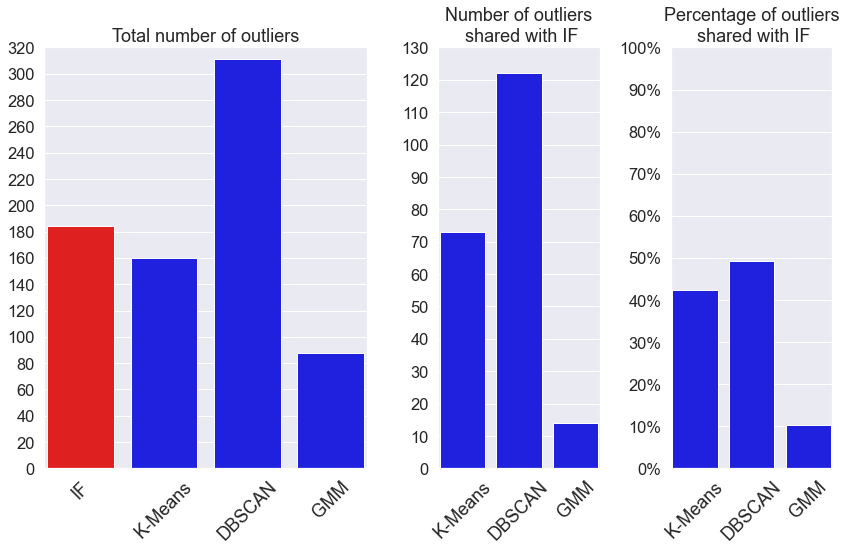

In [17]:
if_anomalies = 184
total_outliers = [if_anomalies, 160, 311, 88]
intersected_outliers = [73, 122, 14]
intersected_outliers_percentage = [42.4,49.3,10.3]

sns.set(rc = {'figure.figsize':(12,8)}, style="darkgrid", font_scale=1.5)
plt.subplots(1,3, gridspec_kw={'width_ratios': [2, 1, 1]})
plt.subplot(1,3,1)
ax = sns.barplot(x="models", y="outliers", data=pd.DataFrame({'models': ['if', 'kmeans','dbscan', 'gmm'], 'outliers': total_outliers}), palette=["red", "blue", "blue", "blue"])
ax.set(title='Total number of outliers', xlabel=None, ylabel=None, xticks=range(len(total_outliers)), yticks=np.arange(0, 321, 20), ylim=(0,320))
ax.set_xticklabels(labels=['IF', 'K-Means', 'DBSCAN', 'GMM'], size=18, rotation=45)
ax.margins(x=.01)
plt.subplot(1,3,2)
ax = sns.barplot(x="models", y="outliers", data=pd.DataFrame({'models': ['kmeans','dbscan', 'gmm'], 'outliers': intersected_outliers}), color="blue")
ax.set(title='Number of outliers\n shared with IF', xlabel=None, ylabel=None, xticks=range(len(intersected_outliers)), yticks=np.arange(0, 131, 10), ylim=(0,130))
ax.set_xticklabels(labels=['K-Means', 'DBSCAN', 'GMM'], size=18, rotation=45)
ax.margins(x=0.01)
plt.subplot(1,3,3)
ax = sns.barplot(x="models", y="outliers", data=pd.DataFrame({'models': ['kmeans','dbscan', 'gmm'], 'outliers': intersected_outliers_percentage}), color="blue")
ax.set(title='Percentage of outliers\n shared with IF', xlabel=None, ylabel=None, xticks=range(len(db_validation_scores)), yticks=np.arange(0, 101, 10), ylim=(0,100))
ax.set_xticklabels(labels=['K-Means', 'DBSCAN', 'GMM'], size=18, rotation=45)
ax.set_yticklabels(labels=['{:.0f}%'.format(x) for x in ax.get_yticks()])
ax.margins(x=0.01)
plt.tight_layout()
plt.show()

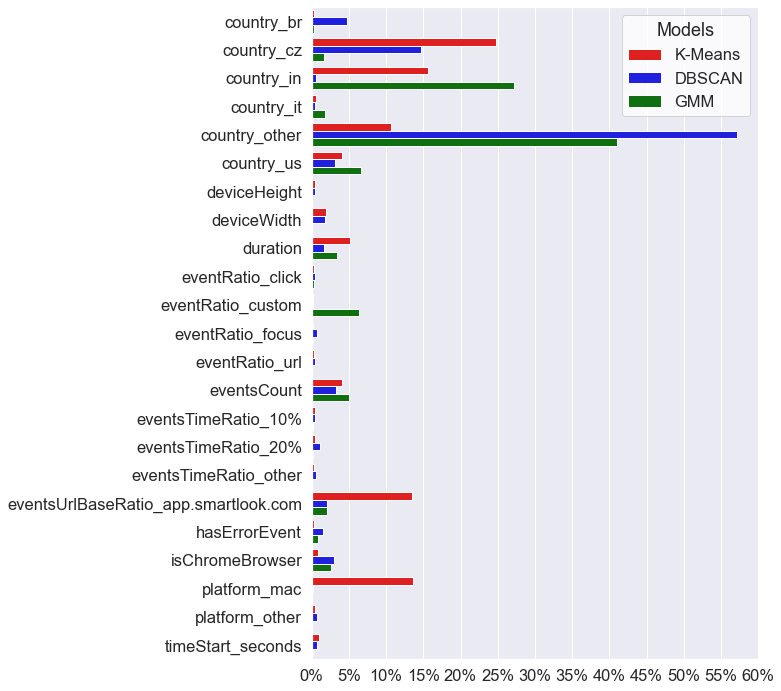

In [40]:
kmeans_feature_importance_df = pd.DataFrame({'column': [column for column, _ in kmeans_feature_importance_values], 'value': [value for _, value in kmeans_feature_importance_values], 'model': 'kmeans'})
dbscan_feature_importance_df = pd.DataFrame({'column': [column for column, _ in dbscan_feature_importance_values], 'value': [value for _, value in dbscan_feature_importance_values], 'model': 'dbscan'})
gmm_feature_importance_df = pd.DataFrame({'column': [column for column, _ in gmm_feature_importance_values], 'value': [value for _, value in gmm_feature_importance_values], 'model': 'gmm'})
feature_importance_df = pd.concat([kmeans_feature_importance_df, dbscan_feature_importance_df, gmm_feature_importance_df], ignore_index=True)

sns.set(rc = {'figure.figsize':(8,12)}, style="darkgrid", font_scale=1.5)

ax = sns.barplot(x="value", y="column", hue="model", data=feature_importance_df, palette=["red", "blue", "green"])
ax.set(title=None, xlabel=None, ylabel=None, xticks=np.arange(0,61,5), xlim=(0, 60), xticklabels=['{}%'.format(value) for value in np.arange(0,61,5)])
h, l = ax.get_legend_handles_labels()
legend = ax.legend(h, ["K-Means", "DBSCAN", "GMM"],title="Models")
legend.get_frame().set_facecolor('#FFFFFF')

plt.show()

## Inter-Cluster Similarity

### Setup

In [41]:
num_of_clusters_dbscan = sessions_dbscan['cluster'].unique()
num_of_clusters_gmm = sessions_gmm['cluster'].unique()
num_of_clusters_kmeans = sessions_kmeans['cluster'].unique()

### DBSCAN with Others

In [43]:
dbscan_similarities = {}
for i in num_of_clusters_dbscan:
    sessions_cluster_dbscan = sessions_dbscan[sessions_dbscan['cluster'] == i]['id']
    
    # GMM
    gmm_best_similarities = {
        "cluster": -2,
        "similarity": 0
    }
    for j in num_of_clusters_gmm:
        sessions_cluster_gmm = sessions_gmm[sessions_gmm['cluster'] == j]['id']
        gmm_similarity = np.in1d(sessions_cluster_dbscan, sessions_cluster_gmm).sum() * 2 / (len(sessions_cluster_dbscan) + len(sessions_cluster_gmm))
        if (gmm_similarity > gmm_best_similarities["similarity"]):
            gmm_best_similarities["similarity"] = gmm_similarity
            gmm_best_similarities["cluster"] = j
    
    # K-Means
    kmeans_best_similarities = {
        "cluster": -2,
        "similarity": 0
    }
    for j in num_of_clusters_kmeans:
        sessions_cluster_kmeans = sessions_kmeans[sessions_kmeans['cluster'] == j]['id']
        kmeans_similarity = np.in1d(sessions_cluster_dbscan, sessions_cluster_kmeans).sum() * 2 / (len(sessions_cluster_dbscan) + len(sessions_cluster_kmeans))
        if kmeans_similarity > kmeans_best_similarities["similarity"]:
            kmeans_best_similarities["similarity"] = kmeans_similarity
            kmeans_best_similarities["cluster"] = j
        
    dbscan_similarities[i] = {'gmm': gmm_best_similarities, 'kmeans': kmeans_best_similarities}

print("Cluster Number | GMM Similarity | K-Means Similarity")
for i in sorted (dbscan_similarities.keys()):
    print("{} & {} ({}\%) & {} ({}\%) \\\\".format("Outliers" if i == -1 else '\#' + str(i + 1), "Outliers" if dbscan_similarities[i]['gmm']['cluster'] == -1 else '\#' + str(dbscan_similarities[i]['gmm']['cluster'] + 1), round(dbscan_similarities[i]['gmm']['similarity'] * 100, 1), "Outliers" if dbscan_similarities[i]['kmeans']['cluster'] == -1 else '\#' + str(dbscan_similarities[i]['kmeans']['cluster'] + 1), round(dbscan_similarities[i]['kmeans']['similarity'] * 100, 1)))
    print("\hline")

Cluster Number | GMM Similarity | K-Means Similarity
Outliers & Outliers (26.6\%) & Outliers (32.7\%) \\
\hline
\#1 & \#3 (68.6\%) & \#4 (62.8\%) \\
\hline
\#2 & \#7 (88.8\%) & \#6 (90.3\%) \\
\hline
\#3 & \#5 (96.9\%) & \#5 (97.8\%) \\
\hline
\#4 & \#2 (97.7\%) & \#9 (96.9\%) \\
\hline
\#5 & \#8 (92.5\%) & \#7 (94.1\%) \\
\hline
\#6 & \#6 (96.4\%) & \#1 (97.0\%) \\
\hline


### GMM with Others

In [44]:
gmm_similarities = {}
for i in num_of_clusters_gmm:
    cluster_sessions_gmm = sessions_gmm[sessions_gmm['cluster'] == i]['id']
    
    # DBSCAN
    dbscan_best_similarities = {
        "cluster": -2,
        "similarity": 0
    }
    for j in num_of_clusters_dbscan:
        sessions_cluster_dbscan = sessions_dbscan[sessions_dbscan['cluster'] == j]['id']
        dbscan_similarity = np.in1d(cluster_sessions_gmm, sessions_cluster_dbscan).sum() * 2 / (len(cluster_sessions_gmm) + len(sessions_cluster_dbscan))
        if (dbscan_similarity > dbscan_best_similarities["similarity"]):
            dbscan_best_similarities["similarity"] = dbscan_similarity
            dbscan_best_similarities["cluster"] = j
    
    # K-Means
    kmeans_best_similarities = {
        "cluster": -2,
        "similarity": 0
    }
    for j in num_of_clusters_kmeans:
        sessions_cluster_kmeans = sessions_kmeans[sessions_kmeans['cluster'] == j]['id']
        kmeans_similarity = np.in1d(cluster_sessions_gmm, sessions_cluster_kmeans).sum() * 2 / (len(cluster_sessions_gmm) + len(sessions_cluster_kmeans))
        if kmeans_similarity > kmeans_best_similarities["similarity"]:
            kmeans_best_similarities["similarity"] = kmeans_similarity
            kmeans_best_similarities["cluster"] = j
        
    gmm_similarities[i] = {'dbscan': dbscan_best_similarities, 'kmeans': kmeans_best_similarities}

print("Cluster Number | DBSCAN Similarity | K-Means Similarity")
for i in sorted (gmm_similarities.keys()):
    print("{} & {} ({}\%) & {} ({}\%) \\\\".format("Outliers" if i == -1 else '\#' + str(i + 1), "Outliers" if gmm_similarities[i]['dbscan']['cluster'] == -1 else '\#' + str(gmm_similarities[i]['dbscan']['cluster'] + 1), round(gmm_similarities[i]['dbscan']['similarity'] * 100, 1), "Outliers" if gmm_similarities[i]['kmeans']['cluster'] == -1 else '\#' + str(gmm_similarities[i]['kmeans']['cluster'] + 1), round(gmm_similarities[i]['kmeans']['similarity'] * 100, 1)))
    print("\hline")

Cluster Number | DBSCAN Similarity | K-Means Similarity
Outliers & Outliers (26.6\%) & \#3 (35.5\%) \\
\hline
\#1 & \#1 (47.2\%) & \#2 (74.0\%) \\
\hline
\#2 & \#4 (97.7\%) & \#9 (96.5\%) \\
\hline
\#3 & \#1 (68.6\%) & \#4 (63.7\%) \\
\hline
\#4 & \#1 (27.4\%) & \#4 (24.9\%) \\
\hline
\#5 & \#3 (96.9\%) & \#5 (98.0\%) \\
\hline
\#6 & \#6 (96.4\%) & \#1 (98.3\%) \\
\hline
\#7 & \#2 (88.8\%) & \#6 (97.6\%) \\
\hline
\#8 & \#5 (92.5\%) & \#7 (98.0\%) \\
\hline


### K-Means with Others

In [45]:
kmeans_similarities = {}
for i in num_of_clusters_kmeans:
    cluster_sessions_kmeans = sessions_kmeans[sessions_kmeans['cluster'] == i]['id']
    
    # DBSCAN
    dbscan_best_similarities = {
        "cluster": -2,
        "similarity": 0
    }
    for j in num_of_clusters_dbscan:
        sessions_cluster_dbscan = sessions_dbscan[sessions_dbscan['cluster'] == j]['id']
        dbscan_similarity = np.in1d(cluster_sessions_kmeans, sessions_cluster_dbscan).sum() * 2 / (len(cluster_sessions_kmeans) + len(sessions_cluster_dbscan))
        if (dbscan_similarity > dbscan_best_similarities["similarity"]):
            dbscan_best_similarities["similarity"] = dbscan_similarity
            dbscan_best_similarities["cluster"] = j
            
    # GMM
    gmm_best_similarities = {
        "cluster": -2,
        "similarity": 0
    }
    for j in num_of_clusters_kmeans:
        sessions_cluster_gmm = sessions_gmm[sessions_gmm['cluster'] == j]['id']
        gmm_similarity = np.in1d(cluster_sessions_kmeans, sessions_cluster_gmm).sum() * 2 / (len(cluster_sessions_kmeans) + len(sessions_cluster_gmm))
        if (gmm_similarity > gmm_best_similarities["similarity"]):
            gmm_best_similarities["similarity"] = gmm_similarity
            gmm_best_similarities["cluster"] = j
            
    kmeans_similarities[i] = {'dbscan': dbscan_best_similarities, 'gmm': gmm_best_similarities}

print("Cluster Number | DBSCAN Similarity | GMM Similarity")
for i in sorted (kmeans_similarities.keys()):
    print("{} & {} ({}\%) & {} ({}\%) \\\\".format("Outliers" if i == -1 else '\#' + str(i + 1), "Outliers" if kmeans_similarities[i]['dbscan']['cluster'] == -1 else '\#' + str(kmeans_similarities[i]['dbscan']['cluster'] + 1), round(kmeans_similarities[i]['dbscan']['similarity'] * 100, 1), "Outliers" if kmeans_similarities[i]['gmm']['cluster'] == -1 else '\#' + str(kmeans_similarities[i]['gmm']['cluster'] + 1), round(kmeans_similarities[i]['gmm']['similarity'] * 100, 1)))
    print("\hline")

Cluster Number | DBSCAN Similarity | GMM Similarity
Outliers & Outliers (32.7\%) & \#4 (11.0\%) \\
\hline
\#1 & \#6 (97.0\%) & \#6 (98.3\%) \\
\hline
\#2 & \#1 (35.4\%) & \#1 (74.0\%) \\
\hline
\#3 & Outliers (32.2\%) & Outliers (35.5\%) \\
\hline
\#4 & \#1 (62.8\%) & \#3 (63.7\%) \\
\hline
\#5 & \#3 (97.8\%) & \#5 (98.0\%) \\
\hline
\#6 & \#2 (90.3\%) & \#7 (97.6\%) \\
\hline
\#7 & \#5 (94.1\%) & \#8 (98.0\%) \\
\hline
\#8 & \#1 (44.0\%) & \#3 (45.9\%) \\
\hline
\#9 & \#4 (96.9\%) & \#2 (96.5\%) \\
\hline


## Outliers

### Setup - Isolation Forest Outlier Detection

In [ ]:
sessions_if = sessions.drop(["id"], axis=1)
if_model = IsolationForest(contamination=0.5, random_state=0)
predicted = if_model.fit_predict(sessions_if)
sessions_if["score"] = if_model.score_samples(sessions_if)
sessions_if["zscore"] = (sessions_if["score"] - np.mean(sessions_if["score"])) / np.std(sessions_if["score"])
if_thresh = -2 # z-score
sessions_if["outlier"] = [True if x < if_thresh else False for x in sessions_if["zscore"]]
sessions_if["id"] = sessions.id
if_anomalies = sessions_if[sessions_if["outlier"] == True]['id']

In [53]:
dbscan_anomalies = sessions_dbscan[sessions_dbscan['cluster'] == -1]['id']
gmm_anomalies = sessions_gmm[sessions_gmm['cluster'] == -1]['id']
kmeans_anomalies = sessions_kmeans[sessions_kmeans['cluster'] == -1]['id']
print("Total K-Means anomalies: {}".format(len(kmeans_anomalies)))
print("Total DBSCAN outliers: {}".format(len(dbscan_anomalies)))
print("Total GMM outliers: {}".format(len(gmm_anomalies)))
print("Total Isolation Forest outliers: {}".format(len(if_anomalies)))

Total K-Means anomalies: 160
Total DBSCAN outliers: 283
Total GMM outliers: 88
Total Isolation Forest outliers: 184


### Comparison in between and with IF

In [55]:
# Isolation Forest
if_dbscan = np.in1d(if_anomalies, dbscan_anomalies).sum() * 2 / (len(if_anomalies) + len(dbscan_anomalies))
if_gmm = np.in1d(if_anomalies, gmm_anomalies).sum() * 2 / (len(if_anomalies) + len(gmm_anomalies))
if_kmeans = np.in1d(if_anomalies, kmeans_anomalies).sum() * 2 / (len(if_anomalies) + len(kmeans_anomalies))
# In between
dbscan_gmm = np.in1d(dbscan_anomalies, gmm_anomalies).sum() * 2 / (len(dbscan_anomalies) + len(gmm_anomalies))
gmm_kmeans = np.in1d(gmm_anomalies, kmeans_anomalies).sum() * 2 / (len(gmm_anomalies) + len(kmeans_anomalies))
kmeans_dbscan = np.in1d(kmeans_anomalies, dbscan_anomalies).sum() * 2 / (len(kmeans_anomalies) + len(dbscan_anomalies))

# Isolation Forest
print("ISOLATION FOREST")
print("DBSCAN & {} ({}\%) \\\\".format(np.in1d(if_anomalies, dbscan_anomalies).sum(), round(if_dbscan * 100, 1)))
print("GMM & {} ({}\%) \\\\".format(np.in1d(if_anomalies, gmm_anomalies).sum(), round(if_gmm * 100, 1)))
print("KMeans & {} ({}\%) \\\\".format(np.in1d(if_anomalies, kmeans_anomalies).sum(), round(if_kmeans * 100, 1)))

# Clustering Models
print("\n\nIN BETWEEN")
print("DBSCAN with GMM {} ({}\%)".format(np.in1d(dbscan_anomalies, gmm_anomalies).sum(), round(dbscan_gmm * 100, 1)))
print("GMM with KMeans {} ({}\%)".format(np.in1d(gmm_anomalies, kmeans_anomalies).sum(), round(gmm_kmeans * 100, 1)))
print("KMeans with DBSCAN {} ({}\%)".format(np.in1d(kmeans_anomalies, dbscan_anomalies).sum(), round(kmeans_dbscan * 100, 1)))

ISOLATION FOREST
DBSCAN & 118 (50.5\%) \\
GMM & 14 (10.3\%) \\
KMeans & 73 (42.4\%) \\


IN BETWEEN
DBSCAN with GMM 53 (28.6\%)
GMM with KMeans 13 (10.5\%)
KMeans with DBSCAN 77 (34.8\%)
